# **Test de imagen y vídeo**

Estas celdas pone a prueba el *core* y algunos bloques de la librería.

Funciona en la versión 0.1.23!

El **core** es estable.
Los bloques, hay algún pequeño error, pero *en general* funcionan.

---

**ATENCIÓN**: Las celdas con vídeo son (muy) lentas si las usas en Colab. Usa un servidor jupyter local.

## **TODO** (img text ds)
* probar interacción con ipywidgets.
* Video2File
* Image2File
* Image2Mask
* Face2Face
* FaceRecognition
* PoseDetection
* HandDetection
* HandGestures
* ClasifyImage
* modificar ObjectID, para reconocer una clase concreta.
* TextEmotion
* Audio2Text
* Text2Audio
* Translate
* TextDistance
* Threshold (de imágenes, de un número, ...)
* GPT (por medio de un API token)
* CustomBlock (block que crea slots/signals en tiempo de ejecución y los enlaza con lambdas)
* Dataset (lectura de datasets previamente empaquetados)
* bloque para entrenar modelos a partir de un dataset: split, fit y su evaluación.
* bloque para mostrar gráficos desde un dataset.
* bloque que predice a partir de un modelo entrenado.
* Semaphore (cambia el color según sus entradas)
* Pet (muestra un perrito/gatito faldero que reacciona a señales)
* https://gymnasium.farama.org/content/basic_usage
* https://towardsdatascience.com/creating-a-custom-gym-environment-for-jupyter-notebooks-e17024474617
* https://pypi.org/project/gym-notebook-wrapper
* visualización.
* editor de bloques.



In [ ]:
# https://mediapipe-studio.webapps.google.com/home

!pip -q install ml4teens==0.1.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 583.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.2 MB/s eta 0:00:00


In [1]:
import warnings;

warnings.filterwarnings('ignore');

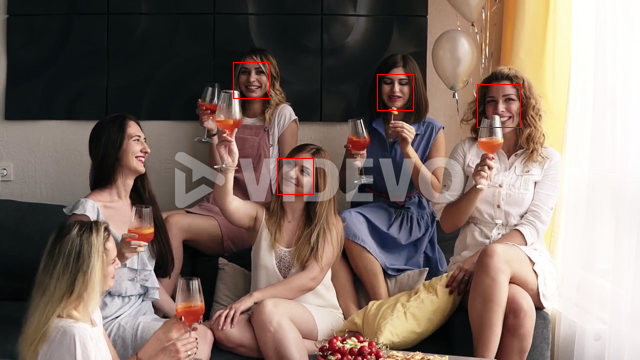

In [2]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context  = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(width=640, speed=1);
facedct  = ml.blocks.img.FaceBoxing();
salida   = ml.blocks.Display();

vídeo  ("frame") >> facedct("image" );
facedct("image") >> salida ("image" );

vídeo("next")    << salida("done");

source="https://v4.cdnpk.net/videvo_files/video/free/video0457/large_watermarked/_import_60bf208e17ef48.95247691_FPpreview.mp4"
context.emit(target=vídeo,  sname="source", data=source);
context.wait();


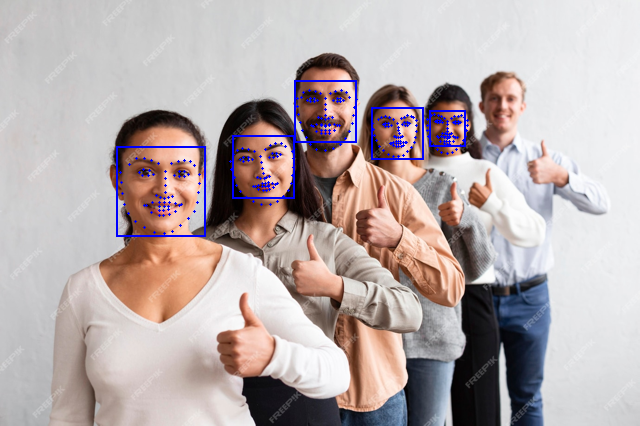

In [3]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource(width=640);
facedctB = ml.blocks.img.FaceBoxing(color="blue", width=2);
facedctL = ml.blocks.img.FaceLandmarks(color="blue", width=2);
salida   = ml.blocks.Display();

imagen  ("image") >> facedctL("image" );
facedctL("image") >> facedctB("image" );
facedctB("image") >> salida  ("image");

source="https://img.freepik.com/foto-gratis/gente-sonriente-dando-pulgar-arriba-sesion-terapia-grupo_23-2148752043.jpg?w=1380&t=st=1704574289~exp=1704574889~hmac=0766e97be83b295a06f324f29f18cbd1f8e59207dd440a2798818f46e548b50e"
context.emit(target=imagen,  sname="source", data=source);
context.wait();


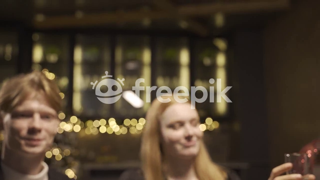

In [4]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(width=320, speed=0.5);
pantalla = ml.blocks.Display();

#vídeo("frame") >> pantalla("image");
#vídeo("next" ) << pantalla("done");

( vídeo("frame") >> pantalla("image") )("done") >> vídeo("next");


context.emit(target=vídeo, sname="source", data="https://v5.cdnpk.net/videvo_files/video/premium/partners0818/large_watermarked/h9699c7ae_V0032_024_FPpreview.mp4");
context.wait();


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


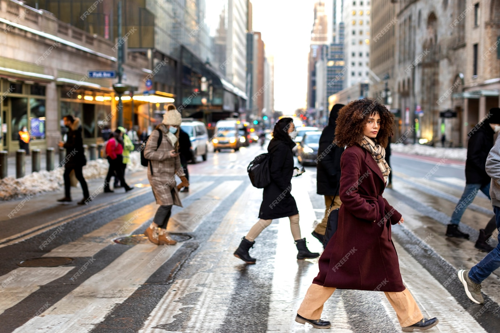

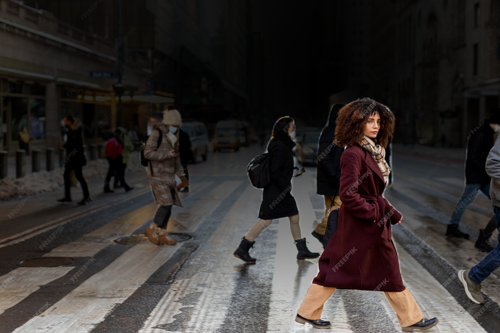

In [5]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
split    = ml.blocks.img.SplitChannels();
merge    = ml.blocks.img.MergeChannels();
depth    = ml.blocks.img.DepthEstimation();
opsR     = ml.blocks.img.ImageOp(op="eval", expression="convert((float(r)/255)*l,'L')");
opsG     = ml.blocks.img.ImageOp(op="eval", expression="convert((float(r)/255)*l,'L')");
opsB     = ml.blocks.img.ImageOp(op="eval", expression="convert((float(r)/255)*l,'L')");
salida   = ml.blocks.Display(width=500, feed=True);

imagen("image") >> split ("image");
imagen("image") >> depth ("image");
imagen("image") >> salida("image");

depth ("image") >> opsR ("left");
depth ("image") >> opsG ("left");
depth ("image") >> opsB ("left");

split("red"   ) >> opsR ("right")
split("green" ) >> opsG ("right")
split("blue"  ) >> opsB ("right")

opsR ("image" ) >> merge("red"  )
opsG ("image" ) >> merge("green")
opsB ("image" ) >> merge("blue" )

merge("image") >> salida("image");

#source="https://img.freepik.com/foto-gratis/mujer-tiro-completo-bicicleta-al-aire-libre_23-2149413735.jpg?w=1380&t=st=1704297833~exp=1704298433~hmac=433c68f72fc841cbb094d598521f8b72dad100a383f59b39de5f490cce7c7b99";
source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen, sname="source", data=source, mods={"sync":True});
context.wait();



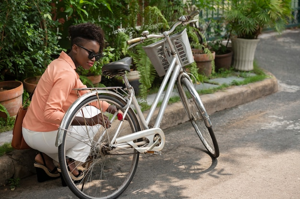

In [6]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
img2text = ml.blocks.img.ImageToText(caption="A photo of an");
terminal = ml.blocks.Terminal();
salida   = ml.blocks.Display(width=300);

imagen  ("image") >> img2text("image" );
imagen  ("image") >> salida  ("image" );
img2text("text" ) >> terminal("stdout");

source="https://img.freepik.com/foto-gratis/mujer-tiro-completo-bicicleta-al-aire-libre_23-2149413735.jpg";
#source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen, sname="source", data=source);
context.wait();


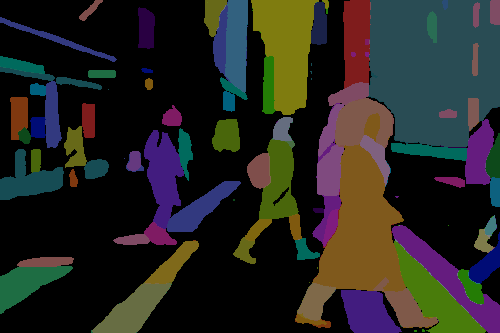

In [7]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource(width=500);
imgseg   = ml.blocks.img.SegmentAll(model_name="s");
salida   = ml.blocks.Display();

imagen("image") >> imgseg("image");
imgseg("mask" ) >> salida("image");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen, sname="source", data=source);
context.wait();


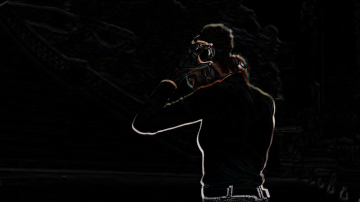

In [8]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(width=360);
op       = ml.blocks.img.ImageOp(op="diff seq");
salida   = ml.blocks.Display();

vídeo ("frame") >> op    ("image");
op    ("image") >> salida("image");

vídeo ("next" ) << salida("done" );

#source="https://v4.cdnpk.net/videvo_files/video/free/video0482/large_watermarked/_import_62bbefe51f3547.77164811_FPpreview.mp4";
source="https://v4.cdnpk.net/videvo_files/video/free/video0460/large_watermarked/_import_60cc3022971d79.05815712_FPpreview.mp4";

context.emit(target=vídeo, sname="source", data=source);
context.wait();


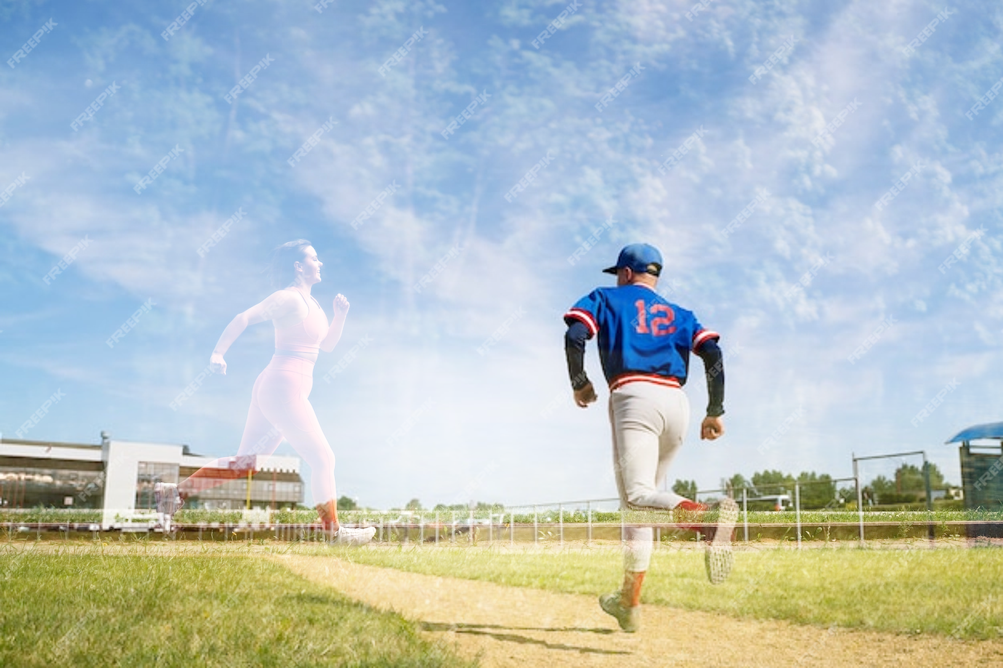

In [9]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

image_left  = ml.blocks.img.ImageSource();
image_right = ml.blocks.img.ImageSource();
op          = ml.blocks.img.ImageOp(op="screen");
salida      = ml.blocks.Display();

image_left ("image") >> op    ("left" );
image_right("image") >> op    ("right");
op         ("image") >> salida("image");

source_left  = "https://img.freepik.com/foto-gratis/mujer-tiro-completo-corriendo-al-aire-libre_23-2149622958.jpg?w=1380&t=st=1704273288~exp=1704273888~hmac=7b34946ecff9d06c9fef1f159d2bdb54361e355eb7c34648b1b153b0cb4a84f7";
source_right = "https://img.freepik.com/foto-gratis/nino-vista-lateral-corriendo-campo_23-2149457304.jpg?t=st=1704273288~exp=1704273888~hmac=7e375feb2153c63c38aed1e5a4bd467c2210a61c6500f14e806299094f57e0dc";

context.emit(target=image_left,  sname="source", data=source_left);
context.emit(target=image_right, sname="source", data=source_right);
context.wait();



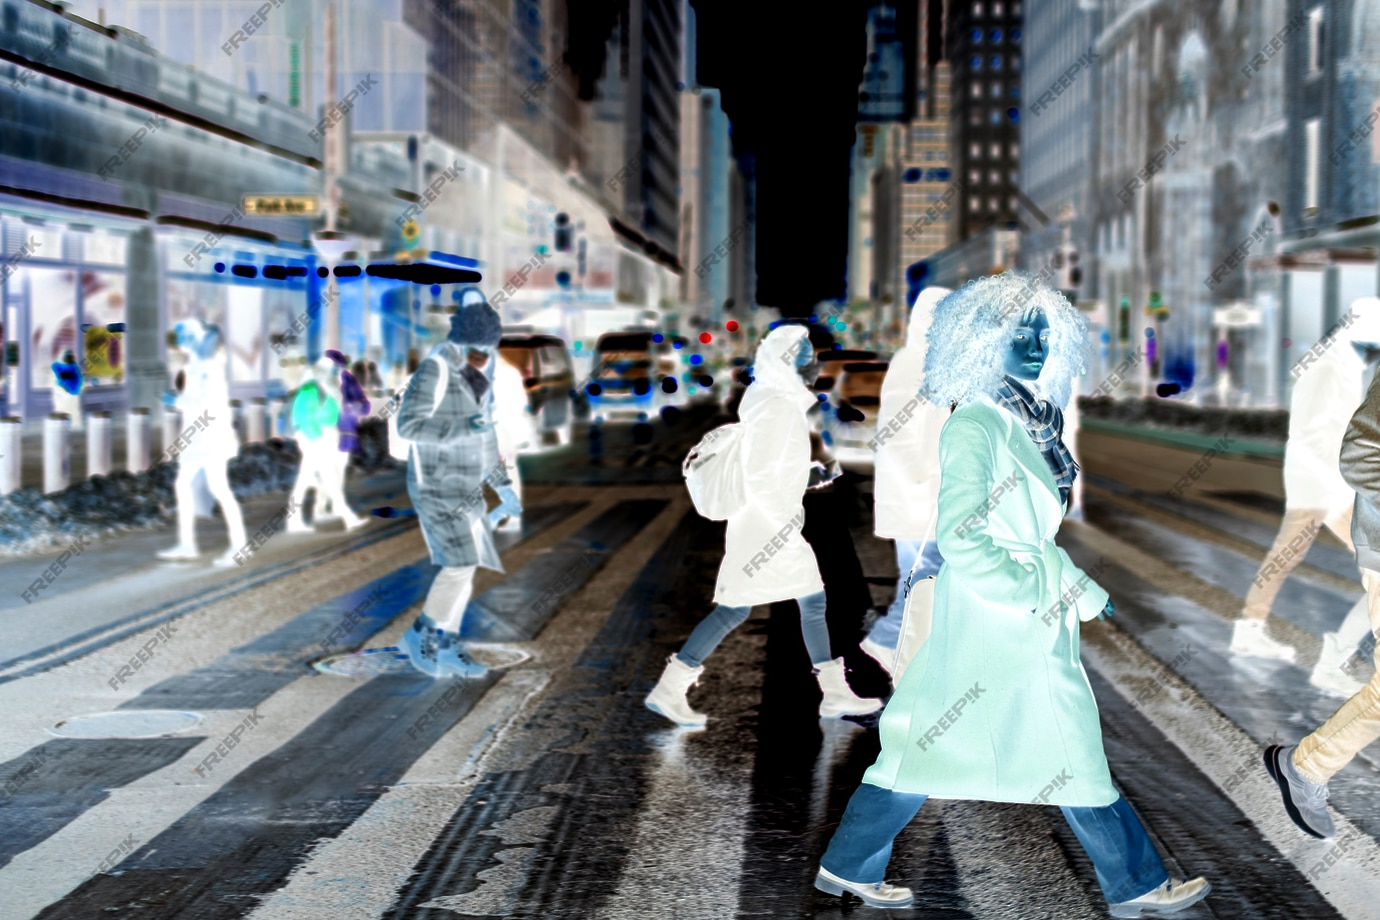

In [10]:
from ml4teens.tools import debug;
debug.disable();

import sys, traceback;

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
op       = ml.blocks.img.ImageOp(op="invert");
salida   = ml.blocks.Display();

imagen("image") >> op    ("image");
op    ("image") >> salida("image");

source = "https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen,  sname="source", data=source);
context.wait();


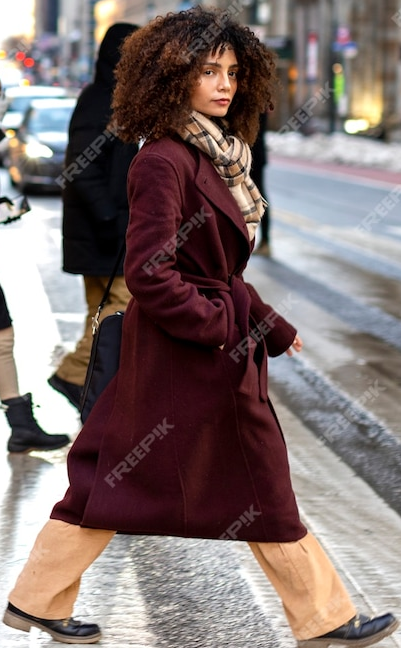

In [11]:
"""
==============================
Falla, con n=2 sólo muestra 1.
==============================
"""

from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance;
context.reset();
context.sync=False;

imagen   = ml.blocks.img.ImageSource();
objid    = ml.blocks.img.ObjectID(model_name="l", n=2);
cropi    = ml.blocks.img.CropImage(); #conf=0.85, classes=[0]);
salida   = ml.blocks.Display(feed=True);

imagen("image") >> objid ("image");
imagen("image") >> cropi ("image");
objid ("boxes") >> cropi ("boxes");
cropi ("image") >> salida("image");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307"

context.emit(target=imagen,  sname="source", data=source);
context.wait();


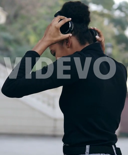

In [12]:
import ml4teens as ml;

context = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(speed=1, width=320);
objid    = ml.blocks.img.ObjectID(model_name="xs");
cropi    = ml.blocks.img.CropImage(n=1);
salida   = ml.blocks.Display(feed=False);

vídeo ("frame") >> objid ("image");
vídeo ("frame") >> cropi ("image");
objid ("boxes") >> cropi ("boxes");
cropi ("image") >> salida("image");

salida("done" ) >> vídeo ("next");

#source="https://v4.cdnpk.net/videvo_files/video/free/video0460/large_watermarked/_import_60cc2f69bd3275.18895086_FPpreview.mp4";
source="https://v4.cdnpk.net/videvo_files/video/free/video0460/large_watermarked/_import_60cc3022971d79.05815712_FPpreview.mp4";

context.emit(target=vídeo, sname="source", data=source);
context.wait();


## Vídeo al que se le ajusta el tamaño según el tamaño de una imagen exterior.

La siguiente celda muestra cómo podemos tener más de un punto de inicio.

**Observar**: se ejecutan (context.run) varios bloques, primero 'imagen' (que establece el shape que ha de tener el vídeo) y luego 'vídeo'.

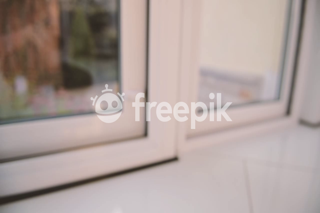

ml4teens.blocks.img.videoSource:VideoSource:: Excepción: 'Se ha invocado al slot 'next' de 'ml4teens.blocks.img.videoSource:VideoSource' sin tener una fuente abierta.'


In [13]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource(width=320);
vídeo    = ml.blocks.img.VideoSource(speed=0.5);
resize   = ml.blocks.img.ResizeImage();
salida   = ml.blocks.Display(feed=False);

imagen("image") >> resize("shape");
vídeo ("frame") >> resize("image");
resize("image") >> salida("image");
imagen("image") >> salida("image");

salida("done" ) >> vídeo ("next");

source_imagen = "https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";
source_vídeo  = "https://v5.cdnpk.net/videvo_files/video/premium/partners0817/large_watermarked/h8caae9f6_V0027_049_B_FPpreview.mp4";

context.emit(target=vídeo,  sname="source", data=source_vídeo);
context.emit(target=imagen, sname="source", data=source_imagen);
context.wait();



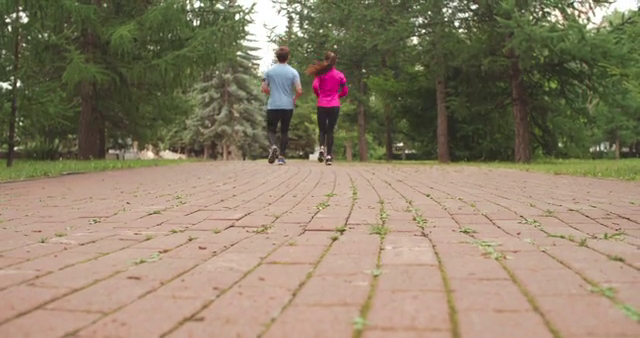

In [14]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(width=640, speed=1.5);
resize   = ml.blocks.img.ResizeImage();
salida   = ml.blocks.Display();

vídeo ("frame") >> resize("image");
resize("image") >> salida("image");

salida("done" ) >> vídeo ("next");

source="https://player.vimeo.com/external/371564393.sd.mp4?s=33b5f1326e4b6dbad0b65ef289fd08ee3835ecbc&profile_id=164&oauth2_token_id=57447761";

context.emit(target=vídeo,  sname="source", data=source);
context.wait();


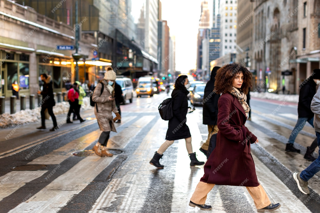

In [15]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();
context.sync=False;

imagen   = ml.blocks.img.ImageSource();
split    = ml.blocks.img.SplitChannels();
merge    = ml.blocks.img.MergeChannels();
salida   = ml.blocks.Display(width=320, feed=True);

imagen("image") >> split ("image");
split ("red"  ) >> merge ("red"  );
split ("green") >> merge ("green");
split ("blue" ) >> merge ("blue" );
merge ("image") >> salida("image");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307"

context.emit(target=imagen,  sname="source", data=source);
context.wait();


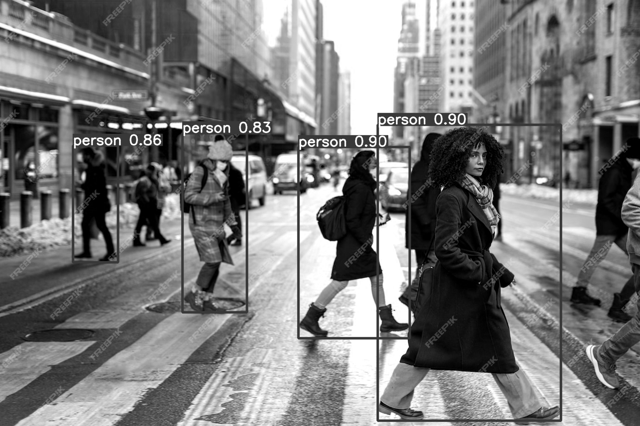

In [16]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
objid    = ml.blocks.img.ObjectID(model_name="xs", conf=0.80);
grey     = ml.blocks.img.SingleChannel(channel=2);
salida   = ml.blocks.Display(width=640);
terminal = ml.blocks.Terminal();

((imagen("image") >> objid("image"))("image") >> grey("image"))("image")>> salida("image");

#objid("boxes") >> terminal("stdout");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen,  sname="source", data=source);
context.wait();



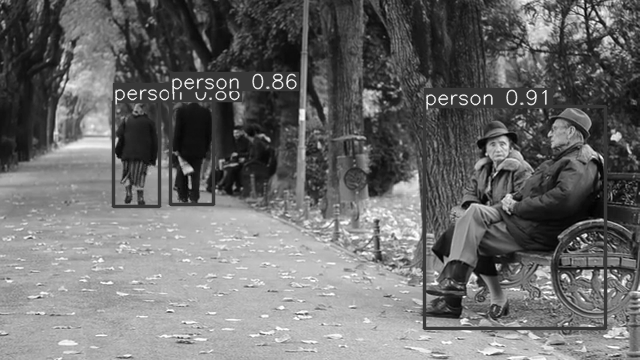

In [17]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource();
grey     = ml.blocks.img.SingleChannel(channel=1);
objid    = ml.blocks.img.ObjectID(model_name="xs", conf=0.60);
salida   = ml.blocks.Display(width=640);

((vídeo("frame") >> objid("image"))("image") >> grey("image"))("image") >> salida("image");

salida("done") >> vídeo ("next");

source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b";

context.emit(target=vídeo,  sname="source", data=source);
context.wait();


**Nueva forma de ejecutar un bloque.**

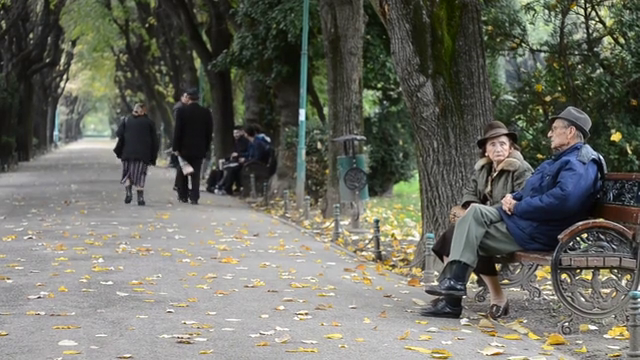

In [19]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource();
salida   = ml.blocks.Display();

vídeo ("frame") >> salida("image");
vídeo ("next" ) << salida("done" );

source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b"

context.emit(target=vídeo, sname="source", data=source);

context.wait();
